In [1]:
import pandas as pd
import numpy as np
import urllib.request
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('diamonds')
price_col = df.pop('price')
df['price'] = price_col
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757


In [15]:
print(df['cut'].unique)
print("\n", df['color'].unique)

<bound method Series.unique of 0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']>

 <bound method Series.unique of 0        E
1        E
2        E
3        I
4        J
        ..
53935    D
53936    D
53937    D
53938    H
53939    D
Name: color, Length: 53940, dtype: category
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']>


In [ ]:
print('\n', df['clarity'].unique)
# carat, cut and color seem to be the categorical columns sooo encode them


 <bound method Series.unique of 0        SI2
1        SI1
2        VS1
3        VS2
4        SI2
        ... 
53935    SI1
53936    SI1
53937    SI1
53938    SI2
53939    SI2
Name: clarity, Length: 53940, dtype: category
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']>


In [3]:
categorical_data = ['cut', 'color', 'clarity']
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_data )], remainder = "passthrough")
X = np.array(ct.fit_transform(df.drop('price', axis=1)))
y = df["price"].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# Regressors
linear = LinearRegression()
svr = SVR(kernel='rbf')
poly = PolynomialFeatures(degree=2)
forest = RandomForestRegressor(n_estimators=100, random_state=0)
decision = DecisionTreeRegressor(random_state=0)

In [6]:
# Multiple linear
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
r_mul = r2_score(y_test, y_pred)
r_mul

0.9212394719973424

In [7]:
# Support vector regression
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_svr = sc_X.fit_transform(X_train)
y_train = y_train.reshape(len(y_train), 1)
y_train_svr = sc_y.fit_transform(y_train)
svr.fit(X_train_svr, y_train_svr)
y_pred = sc_y.inverse_transform(svr.predict(sc_X.transform(X_test)).reshape(-1, 1))
r_svr = r2_score(y_test, y_pred)
r_svr

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9759657923744826

In [8]:
# Polynomial regression
X_poly = poly.fit_transform(X_train)
linear.fit(X_poly, y_train)
y_pred = linear.predict(poly.transform(X_test))
r_poly = r2_score(y_test, y_pred)
r_poly

0.9657833833072323

In [9]:
# Decision tree
decision.fit(X_train, y_train)
y_pred = decision.predict(X_test)
r_tree = r2_score(y_test, y_pred)
r_tree

0.9661014753845734

In [10]:
# Random forest regression
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
r_forest = r2_score(y_test, y_pred)
r_forest

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9810919463661087

C:\Users\DELL\AppData\Local\Temp\ipykernel_17708\1970954569.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model, y=r2_score, palette="Blues")


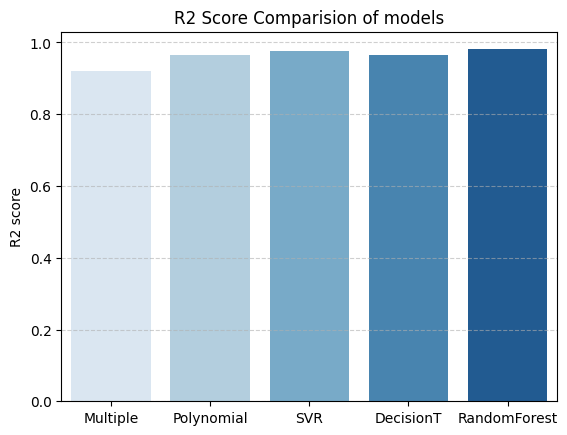

In [ ]:
model = ["Multiple", "Polynomial", "SVR", "DecisionT", "RandomForest"]
r2_score = [r_mul, r_poly, r_svr, r_tree, r_forest]
sns.barplot(x=model, y=r2_score, palette="Blues")
plt.title("R2 Score Comparision of models")
plt.ylabel("R2 score")
plt.grid(axis='y', linestyle='--', alpha=0.6) # alpha -> transparency
plt.show()